<a href="https://colab.research.google.com/github/niklasbinder/men_thesis/blob/main/3_men_cite_protein.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scanpy igraph harmonypy

In [ ]:
import scanpy as sc
import anndata as ad
import os
import numpy as np
import pandas as pd

In [ ]:
os.chdir("/content/drive/MyDrive/meningioma_analysis")
os.getcwd()

'/content/drive/MyDrive/meningioma_analysis'

In [ ]:
sc.settings.set_figure_params(dpi=100,frameon=False)
sc.settings.verbosity = 3


In [ ]:
samples = {
    "Men329": "data/Men329/count/sample_filtered_feature_bc_matrix.h5",
    "Men705": "data/Men705/count/sample_filtered_feature_bc_matrix.h5",
    "Men721": "data/Men721/count/sample_filtered_feature_bc_matrix.h5",
    "Men1104": "data/Men1104/count/sample_filtered_feature_bc_matrix.h5",
    "Men3124": "data/Men3124/count/sample_filtered_feature_bc_matrix.h5",
    "Men8924": "data/Men8924/count/sample_filtered_feature_bc_matrix.h5"
}

adatas = {}

for sample_id, file_path in samples.items():
    # Check if the file exists
    if not os.path.exists(file_path):
        print(f"Warning: File not found for {sample_id}: {file_path}")
        continue

    # Read the 10x h5 file, including both RNA and protein data
    sample_adata = sc.read_10x_h5(file_path, gex_only=False)

    # Make variable names unique
    sample_adata.var_names_make_unique()

    # Add sample ID to obs
    sample_adata.obs['sample'] = sample_id

    # Extract only the protein component
    protein_adata = sample_adata[:, sample_adata.var['feature_types'] == 'Antibody Capture']

    # Add the protein data to the dictionary
    adatas[sample_id] = protein_adata

# Concatenate all protein data
adata_concat = ad.concat(adatas.values(), label="sample", keys=adatas.keys(), join="outer", merge="same")


# Basic preprocessing
sc.pp.normalize_total(adata_concat, target_sum=1e4)
sc.pp.log1p(adata_concat)

# Compute highly variable proteins (optional)
#sc.pp.highly_variable_genes(adata_concat, flavor='seurat', n_top_genes=100, batch_key='sample')

print(f"Combined object shape: {adata_concat.shape}")
print(f"Number of samples: {adata_concat.obs['sample'].nunique()}")
print(f"Number of proteins: {adata_concat.n_vars}")

# Save the combined object (optional)
adata_concat.write_h5ad('combined_citeseq_protein.h5ad')

# Print the first few protein names
print("First few protein names:")
print(adata_concat.var_names[:10])

# Print summary statistics
print("\nSummary statistics:")
print(adata_concat.obs['sample'].value_counts())


reading data/Men329/count/sample_filtered_feature_bc_matrix.h5
 (0:00:00)
reading data/Men705/count/sample_filtered_feature_bc_matrix.h5


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading data/Men721/count/sample_filtered_feature_bc_matrix.h5


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading data/Men1104/count/sample_filtered_feature_bc_matrix.h5


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading data/Men3124/count/sample_filtered_feature_bc_matrix.h5


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading data/Men8924/count/sample_filtered_feature_bc_matrix.h5
 (0:00:00)


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


normalizing counts per cell
    finished (0:00:00)
Combined object shape: (11040, 143)
Number of samples: 6
Number of proteins: 143
First few protein names:
Index(['Hu.CD101', 'Hu.CD103', 'Hu.CD105_43A3', 'Hu.CD107a', 'Hu.CD112',
       'Hu.CD115', 'Hu.CD119', 'Hu.CD11a', 'Hu.CD11b', 'Hu.CD11c'],
      dtype='object')

Summary statistics:
sample
Men705     2450
Men329     2276
Men721     2115
Men3124    1740
Men1104    1651
Men8924     808
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


In [ ]:
adata = adata_concat.copy()

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [ ]:
rna = adata[:, adata.var["feature_types"] == "Gene Expression"].copy()
protein = adata[:, adata.var["feature_types"] == "Antibody Capture"].copy()

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [ ]:
protein.var_names

Index(['Hu.CD101', 'Hu.CD103', 'Hu.CD105_43A3', 'Hu.CD107a', 'Hu.CD112',
       'Hu.CD115', 'Hu.CD119', 'Hu.CD11a', 'Hu.CD11b', 'Hu.CD11c',
       ...
       'HuMs.CD44', 'HuMs.CD49f', 'HuMs.integrin.b7', 'HuMsRt.CD278',
       'Isotype_MOPC.173', 'Isotype_MOPC.21', 'Isotype_MPC.11',
       'Isotype_RTK2071', 'Isotype_RTK2758', 'Isotype_RTK4530'],
      dtype='object', length=140)

In [ ]:
protein.layers["counts"] = protein.X.copy()

In [ ]:

sc.pp.normalize_per_cell(protein)
sc.pp.log1p(protein)



normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added
    'n_counts', counts per cell before normalization (adata.obs)


In [ ]:

#sc.pp.pca(adata, n_comps=20)
sc.external.pp.harmony_integrate(adata, key="sample")
sc.pp.neighbors(adata, n_neighbors=30,use_rep="X_pca_harmony")
sc.tl.leiden(adata, key_added="leiden",resolution=1,flavor="igraph")



2024-10-07 14:21:02,363 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...
2024-10-07 14:21:04,819 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2024-10-07 14:21:04,861 - harmonypy - INFO - Iteration 1 of 10
INFO:harmonypy:Iteration 1 of 10
2024-10-07 14:21:07,607 - harmonypy - INFO - Iteration 2 of 10
INFO:harmonypy:Iteration 2 of 10
2024-10-07 14:21:11,405 - harmonypy - INFO - Converged after 2 iterations
INFO:harmonypy:Converged after 2 iterations


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:05)
running Leiden clustering
    finished: found 11 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:11)


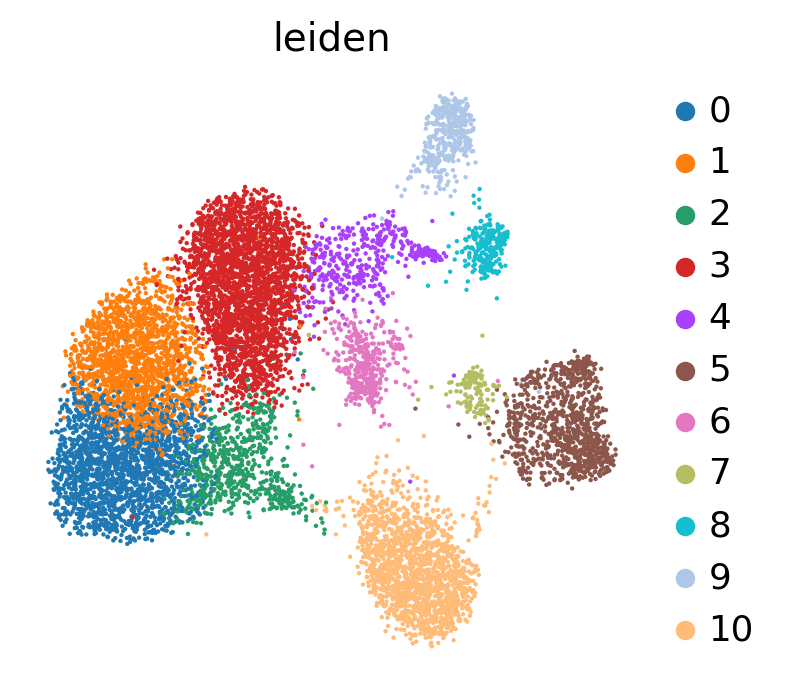

In [ ]:
sc.tl.umap(adata)
sc.pl.umap(adata, color="leiden", size=10)

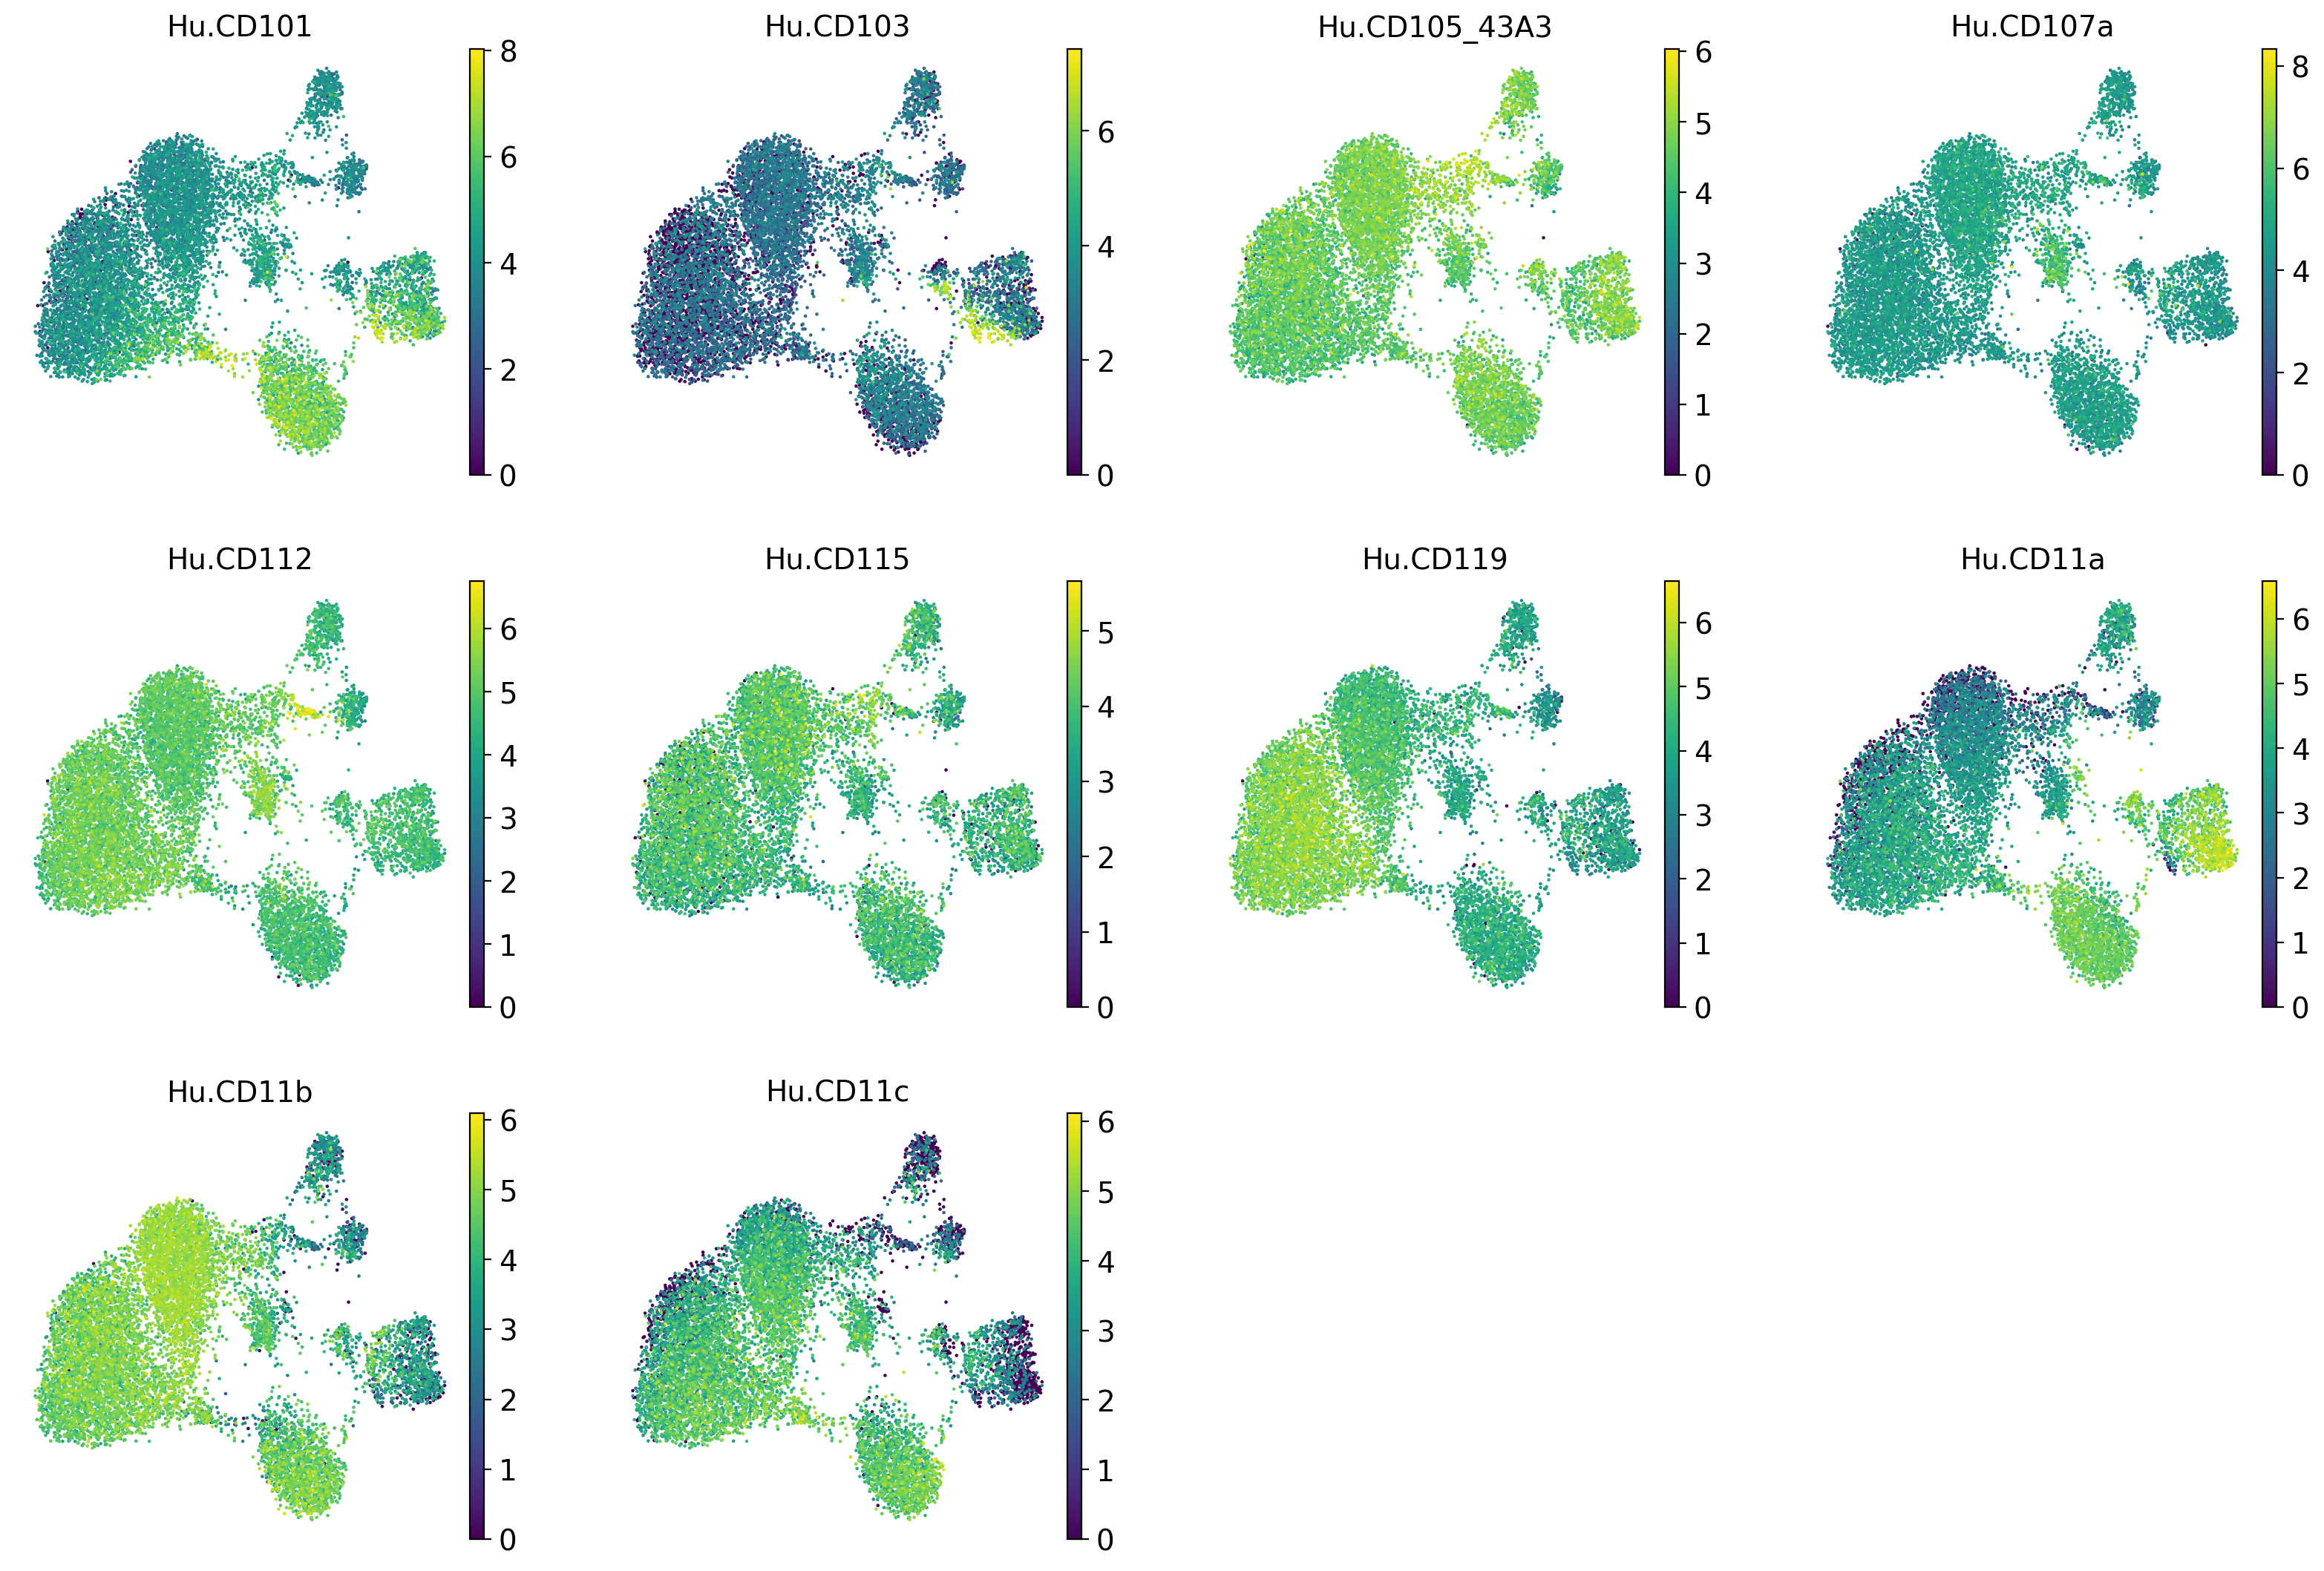

In [ ]:
sc.pl.umap(adata,color=['Hu.CD101', 'Hu.CD103', 'Hu.CD105_43A3', 'Hu.CD107a', 'Hu.CD112',
       'Hu.CD115', 'Hu.CD119', 'Hu.CD11a', 'Hu.CD11b', 'Hu.CD11c'])

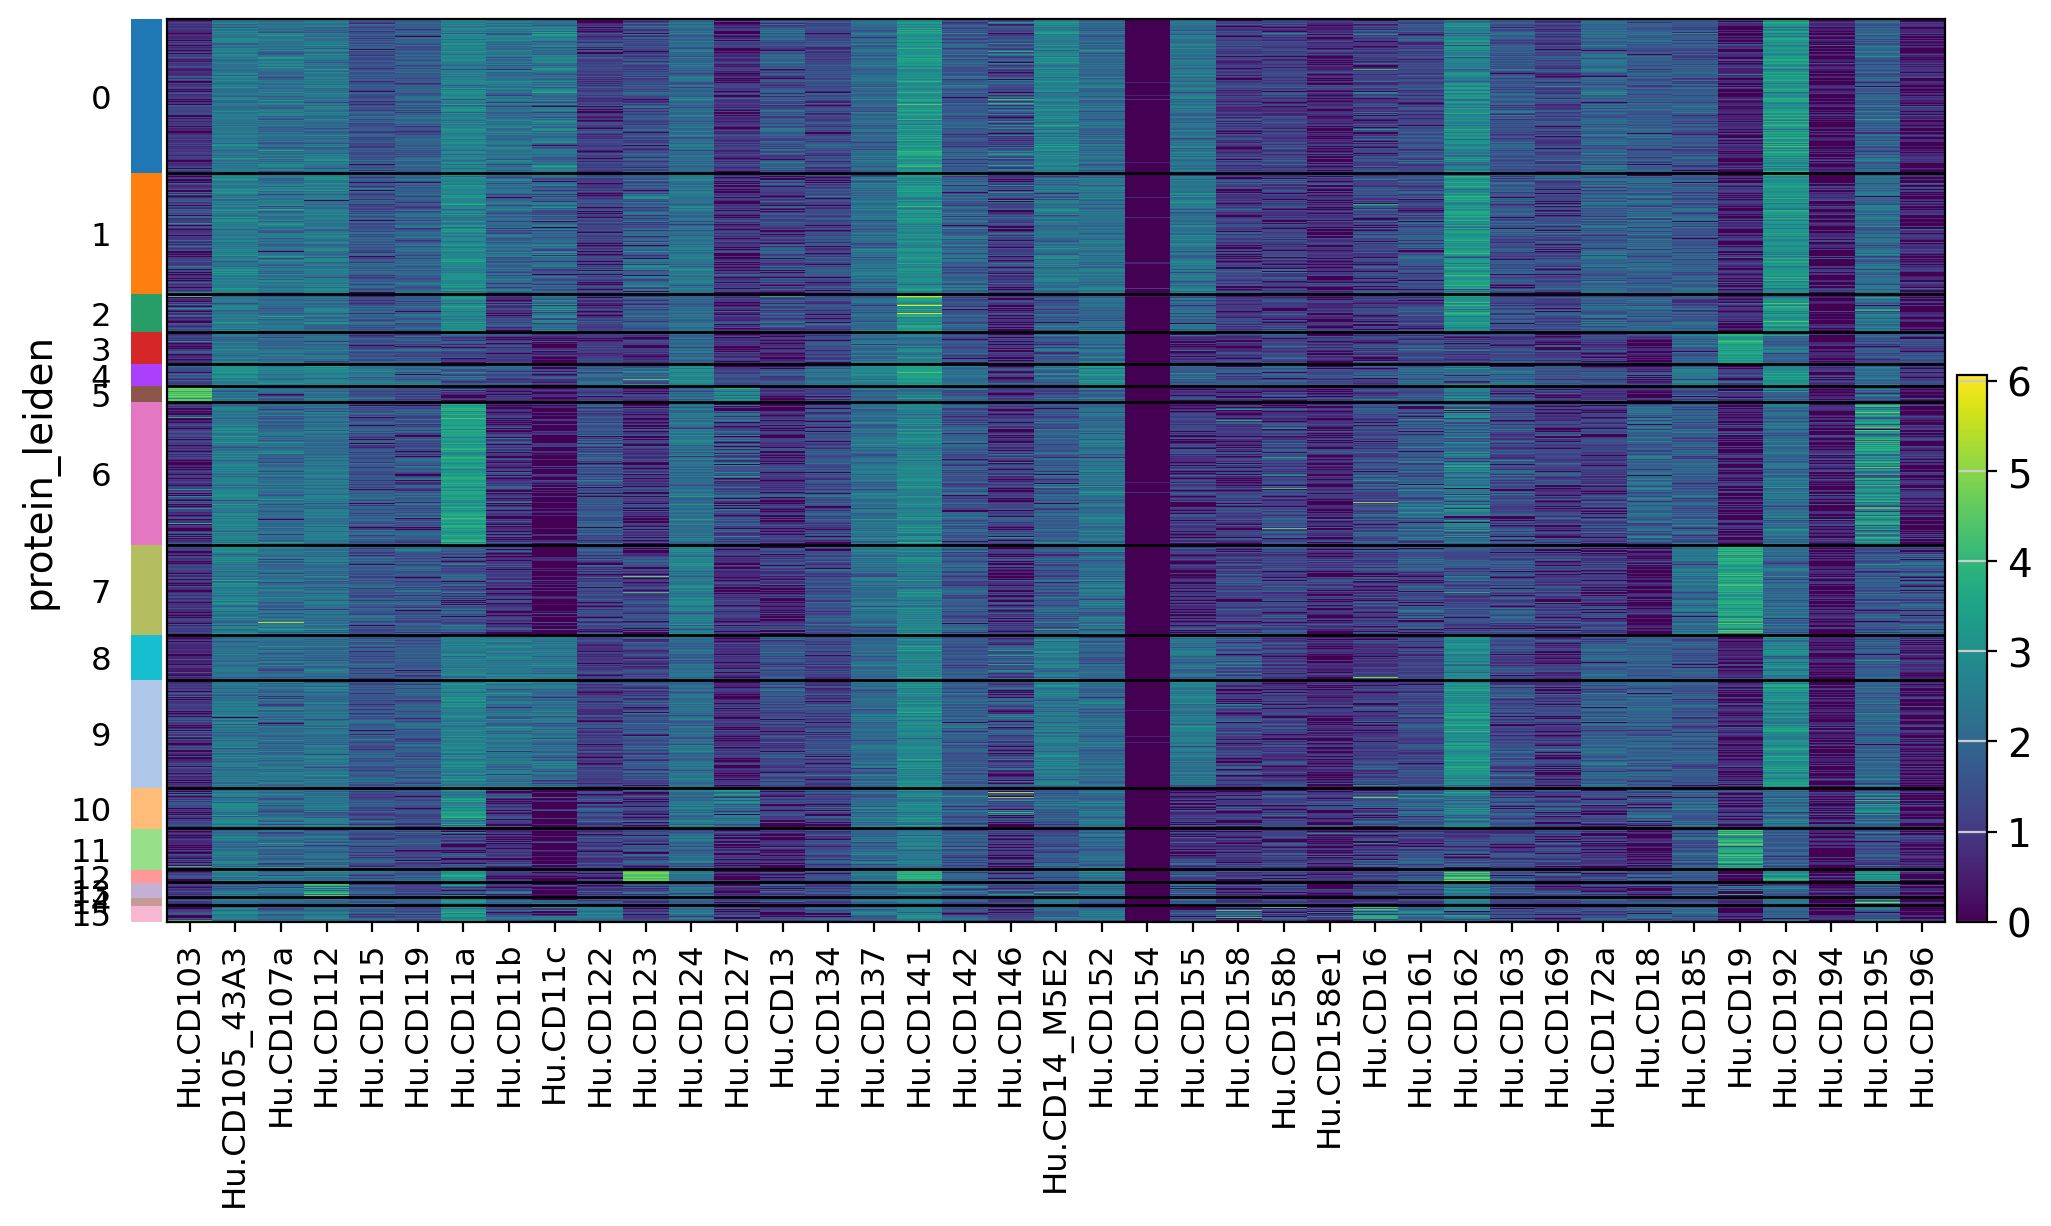

In [ ]:
sc.pl.heatmap(
    protein,
    protein.var_names[1:40],
    groupby="protein_leiden",


)

In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

True

In [26]:
!pip install --quiet scvi-colab
from scvi_colab import install

install()

INFO     scvi-colab: Installing scvi-tools.                                                                        
INFO     scvi-colab: Install successful. Testing import.                                                           


In [27]:
import tempfile

import anndata as ad
import matplotlib.pyplot as plt
import mudata as md
import muon
import scanpy as sc
import scvi
import seaborn as sns
import torch


In [28]:
scvi.settings.seed = 0
print("Last run with scvi-tools version:", scvi.__version__)

INFO: Seed set to 0
INFO:lightning.fabric.utilities.seed:Seed set to 0


Last run with scvi-tools version: 1.2.0


In [29]:
sc.set_figure_params(figsize=(6, 6), frameon=False)
sns.set_theme()
torch.set_float32_matmul_precision("high")
save_dir = tempfile.TemporaryDirectory()

%config InlineBackend.print_figure_kwargs={"facecolor": "w"}
%config InlineBackend.figure_format="retina"

In [30]:
adata = scvi.data.pbmcs_10x_cite_seq(save_path=save_dir.name)
adata

INFO     Downloading file at /tmp/tmpq97ollzl/pbmc_10k_protein_v3.h5ad                                             


Downloading...:   0%|          | 0/24937.0 [00:00<?, ?it/s]

INFO     Downloading file at /tmp/tmpq97ollzl/pbmc_5k_protein_v3.h5ad                                              


Downloading...:   0%|          | 0/18295.0 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/scvi/data/_built_in_data/_cite_seq.py:47: ImplicitModificationWarning: Setting element `.obsm['protein_expression']` of view, initializing view as actual.
  dataset1.obsm["protein_expression"] = pd.DataFrame(
/usr/local/lib/python3.10/dist-packages/scvi/data/_built_in_data/_cite_seq.py:52: ImplicitModificationWarning: Setting element `.obsm['protein_expression']` of view, initializing view as actual.
  dataset2.obsm["protein_expression"] = pd.DataFrame(
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 10849 × 15792
    obs: 'n_genes', 'percent_mito', 'n_counts', 'batch'
    obsm: 'protein_expression'

In [31]:
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
adata.obs_names_make_unique()

normalizing counts per cell
    finished (0:00:00)


In [32]:
protein_adata = ad.AnnData(adata.obsm["protein_expression"])
protein_adata.obs_names = adata.obs_names
del adata.obsm["protein_expression"]
mdata = md.MuData({"rna": adata, "protein": protein_adata})
mdata

/usr/local/lib/python3.10/dist-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/usr/local/lib/python3.10/dist-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


MuData object with n_obs × n_vars = 10849 × 15806
  2 modalities
    rna:	10849 x 15792
      obs:	'n_genes', 'percent_mito', 'n_counts', 'batch'
      uns:	'log1p'
      layers:	'counts'
    protein:	10849 x 14

In [33]:
sc.pp.highly_variable_genes(
    mdata.mod["rna"],
    n_top_genes=4000,
    flavor="seurat_v3",
    batch_key="batch",
    layer="counts",
)
# Place subsetted counts in a new modality
mdata.mod["rna_subset"] = mdata.mod["rna"][:, mdata.mod["rna"].var["highly_variable"]].copy()

extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)


In [34]:
mdata.update()

/usr/local/lib/python3.10/dist-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/usr/local/lib/python3.10/dist-packages/mudata/_core/mudata.py:931: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_com

In [35]:
scvi.model.TOTALVI.setup_mudata(
    mdata,
    rna_layer="counts",
    protein_layer=None,
    batch_key="batch",
    modalities={
        "rna_layer": "rna_subset",
        "protein_layer": "protein",
        "batch_key": "rna_subset",
    },
)

In [36]:
model = scvi.model.TOTALVI(mdata)

INFO     Computing empirical prior initialization for protein background.                                          


In [37]:
model.train()

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/core/optimizer.py:316: The lr scheduler dict contains the key(s) ['monitor'], but the keys will be ignored. You need to call `lr_scheduler.step()` manually in manual optimization.


Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric elbo_validation did not improve in the last 45 records. Best score: 1240.495. Signaling Trainer to stop.


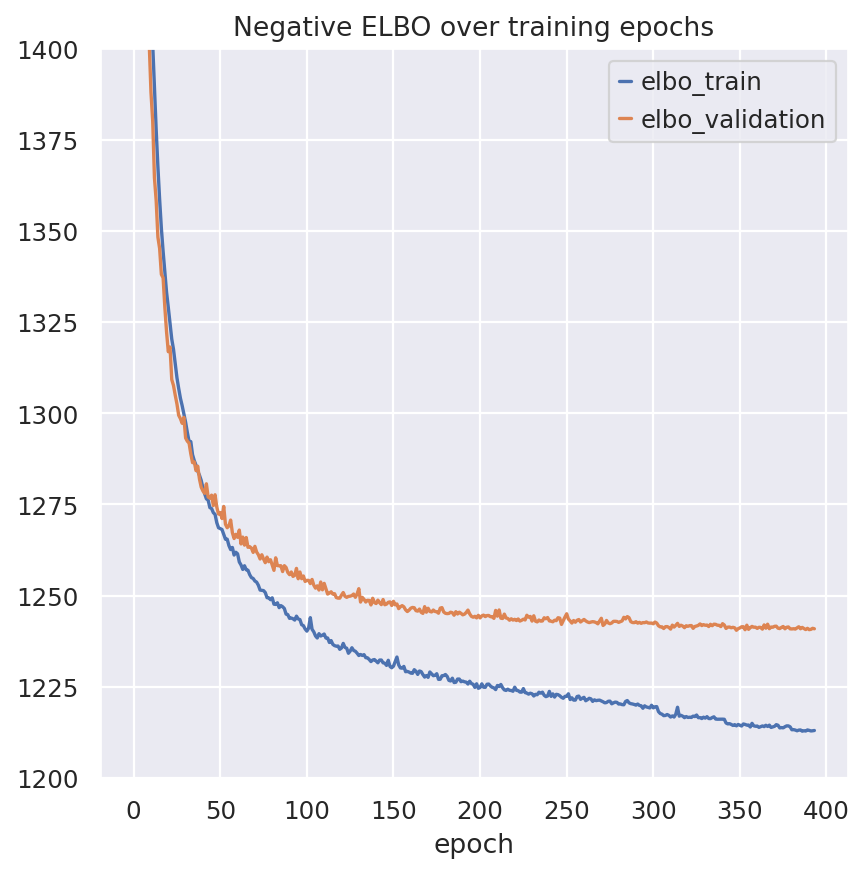

In [38]:
fig, ax = plt.subplots(1, 1)
model.history["elbo_train"].plot(ax=ax, label="train")
model.history["elbo_validation"].plot(ax=ax, label="validation")
ax.set(title="Negative ELBO over training epochs", ylim=(1200, 1400))
ax.legend()

In [39]:
rna = mdata.mod["rna_subset"]
protein = mdata.mod["protein"]

In [40]:
# arbitrarily store latent in rna modality
TOTALVI_LATENT_KEY = "X_totalVI"
rna.obsm[TOTALVI_LATENT_KEY] = model.get_latent_representation()

In [ ]:
rna_denoised, protein_denoised = model.get_normalized_expression(
    n_samples=25, return_mean=True, transform_batch=["PBMC10k", "PBMC5k"]
)
rna.layers["denoised_rna"] = rna_denoised
protein.layers["denoised_protein"] = protein_denoised

protein.layers["protein_foreground_prob"] = 100 * model.get_protein_foreground_probability(
    n_samples=25, return_mean=True, transform_batch=["PBMC10k", "PBMC5k"]
)
parsed_protein_names = [p.split("_")[0] for p in protein.var_names]
protein.var["clean_names"] = parsed_protein_names
mdata.update()

In [ ]:
TOTALVI_CLUSTERS_KEY = "leiden_totalVI"

sc.pp.neighbors(rna, use_rep=TOTALVI_LATENT_KEY)
sc.tl.umap(rna)
sc.tl.leiden(rna, key_added=TOTALVI_CLUSTERS_KEY)
